# Analysis 1

- *Isolate 17 LVs associate to T1D related traits*
- What are these LVs telling us
- *Look at 17 LVs are expressed in RNAseq from Whole blood* 
- Compute 17 daisy anova using LVs from UKbiobank and emerge
- What are these LVs telling us in three group 
- Look at signatures from the three groups within LVs of interest 
- look at the boxplot for top 17 LVs (UK biobank)

## load packages 

In [5]:
library(tidyverse, warn.conflicts=FALSE)
library("ggpubr")
library(reticulate)
library(jsonlite)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘jsonlite’


The following object is masked from ‘package:purrr’:

    flatten




## LV's expression in DAISY data grouped by IA progression pattern

### Data 1: Importing Projected data at time point 1 and 2 and substracting LVs

In [7]:
DAISY_diff_proj_1 <- readRDS(paste0("output/gp_RNA_proj_1.rds"))
DAISY_diff_proj_2 <- readRDS(paste0("output/gp_RNA_proj_2.rds"))
## difference between the two 
Daisy_diff <- DAISY_diff_proj_1[,2:988] - DAISY_diff_proj_2[,2:988]
DAISY_LV_diff <- DAISY_diff_proj_1
DAISY_LV_diff[,2:988] <- Daisy_diff
head(DAISY_LV_diff,5)

,ID,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,⋯,LV979,LV980,LV981,LV982,LV983,LV984,LV985,LV986,LV987,Group
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<ord>
1,00041-0,0.11140203,-0.021818790,-0.0535675047,0.067776314,-0.004886417,-0.01349279,-0.21384901,-0.02506244,-0.02602336,⋯,0.056442779,0.031079155,0.039551201,-0.003216641,0.05876335,-0.1235162,-0.21851990,0.002038538,0.01719279,Maintainer
2,00110-0,-0.07227066,-0.031820395,-0.0017124683,0.005697077,0.001916463,0.01898339,0.20061505,0.04795546,0.01731360,⋯,-0.000887035,-0.040743388,-0.020157308,-0.009622277,-0.01772465,-0.2701976,0.03313927,0.022591122,0.06483950,Reverter
3,00139-0,-0.06975536,-0.061082676,-0.0900765329,0.150849341,-0.078259462,0.05815224,-0.03904118,0.02301079,-0.06903941,⋯,-0.034678138,-0.005332622,-0.022895423,0.014878154,-0.05049221,-0.1304244,0.21384840,0.008425512,0.06776475,Reverter
4,00159-0,-0.07806625,0.397310916,-0.0416671066,0.086283757,0.015893750,-0.03211687,0.09401872,0.02830306,-0.06440271,⋯,0.039194495,-0.006062143,0.043149383,0.048552636,-0.03130918,-0.4727951,0.32350161,-0.087352049,-0.03400709,Maintainer
5,00174-0,-0.06436926,0.005807392,-0.0002256534,0.018971156,-0.014683138,-0.02381849,-0.08329137,-0.01727677,0.00179197,⋯,0.009958269,-0.016433316,0.006428658,-0.008130357,0.04461014,0.1835539,-0.01664969,0.010559217,-0.10689044,Progressor


### Data 2: Computing DAISY expression difference (tp2 - tp1), then project the difference into LV space  

In [8]:
#tp <- "1"
#tp <- "2" 
tp <- "diff"

DAISY_diff_proj <- readRDS(paste0("output/gp_RNA_proj_",tp,".rds"))
head(DAISY_diff_proj,5)

,ID,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,⋯,LV979,LV980,LV981,LV982,LV983,LV984,LV985,LV986,LV987,Group
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<ord>
1,00041-0,0.06533240,-0.011055519,-0.0287143635,0.036526145,0.001051845,-0.004441117,-0.12540642,-0.01658177,-0.0173158695,⋯,0.036741179,0.023540136,0.029886622,-0.002217311,0.03846297,-0.06393674,-0.134816383,0.002138531,0.009733345,Maintainer
2,00110-0,-0.04267481,-0.020391543,-0.0001745483,0.003682194,-0.002243756,0.008158552,0.11867353,0.02813421,0.0131125908,⋯,-0.003676397,-0.034794733,-0.010491055,-0.007721971,-0.01465504,-0.14834049,0.008681795,0.015668703,0.035779363,Reverter
3,00139-0,-0.04162543,-0.036730092,-0.0469522326,0.089392721,-0.049189611,0.032472113,-0.02172676,0.01238158,-0.0403871139,⋯,-0.023873847,0.002156358,-0.010940347,0.010072032,-0.03348186,-0.08142656,0.123767615,0.001222313,0.039788403,Reverter
4,00159-0,-0.04801535,0.232065205,-0.0263503818,0.054358188,0.010838359,-0.023821148,0.05710884,0.01861838,-0.0385121968,⋯,0.023145471,-0.004236950,0.022258250,0.029260069,-0.02153985,-0.29057564,0.194484202,-0.055334761,-0.026108705,Maintainer
5,00174-0,-0.04422143,0.005648297,0.0019395758,0.012030349,-0.009526595,-0.011986414,-0.04859658,-0.01209706,0.0006907144,⋯,0.005872110,-0.009735373,0.005824244,-0.007314493,0.03117020,0.11755467,-0.011915534,0.009478003,-0.068822916,Progressor


## Prioritizing LVs associated with T1D in both UK Biobank and e-merge

### Importing data: UKBiobank and emerge LV, phenotype traits strings

In [9]:
# Import data
gls_phenomexcan <- readRDS("data/input/gls-summary-phenomexcan.rds")
gls_emerge <- readRDS("data/input/gls-summary-emerge.rds")

# Type 1 diabetes traits in dataset 
UK_biobank_traits <-  c('Type 1 diabetes with ketoacidosis','Type 1 diabetes', 'Non-cancer illness code, self-reported: type 1 diabetes', 'Type 1 diabetes without complications','Type 1 diabetes with ophthalmic complications')
emerge_trait <- 'Type 1 diabetes'

# setting threshold 
threshold <- 0.05

### LVs associated with T1D in phenomexcan and emerge at an FDR adjusted `threshold`

In [28]:
## Phenomexcan
phe_T1D_LVs <- gls_phenomexcan[gls_phenomexcan$phenotype_desc %in% UK_biobank_traits,]
phe_T1D_LVs$new_fdr_UK <- p.adjust(phe_T1D_LVs$pvalue, method = "BH")
phe_T1D_LVs_0.05_fdr <- phe_T1D_LVs[phe_T1D_LVs$new_fdr_UK < threshold,]

## E-merge
e_T1D_LVs <- gls_emerge[gls_emerge$phenotype_desc %in% emerge_trait,]
e_T1D_LVs$new_fdr_e <- p.adjust(e_T1D_LVs$pvalue, method = "BH")
e_T1D_LVs_0.05_fdr <- e_T1D_LVs[e_T1D_LVs$new_fdr_e < threshold,]

## Joining Phenomexcana and E-merge
phe_U_e_fdr_0.05 <- inner_join(phe_T1D_LVs_0.05_fdr,e_T1D_LVs_0.05_fdr, by = "lv")

## Phenotype description code (.x is UKbiobank, .y is emerge)
pheno_descr_code <- phe_U_e_fdr_0.05 [,c('phenotype.x','phenotype_desc.x','phenotype.y','phenotype_desc.y')]%>%
distinct()
pheno_descr_code

## remove columns that are not needed
merged_cohort_T1D <- phe_U_e_fdr_0.05%>%
arrange(lv)%>%
select(c(3,2,4,6,8,9,11))
colnames(merged_cohort_T1D) <- c("LV","UK-Bio-Pheno", "UK-Bio-p-value","UK_Bio_fdr","emerge-pheno","emerge-p-value","emerge-fdr")
merged_cohort_T1D

phenotype.x,phenotype_desc.x,phenotype.y,phenotype_desc.y
<fct>,<fct>,<fct>,<fct>
E4_DM1KETO,Type 1 diabetes with ketoacidosis,EUR_250.1,Type 1 diabetes
E4_DM1,Type 1 diabetes,EUR_250.1,Type 1 diabetes
20002_1222,"Non-cancer illness code, self-reported: type 1 diabetes",EUR_250.1,Type 1 diabetes
E4_DM1NOCOMP,Type 1 diabetes without complications,EUR_250.1,Type 1 diabetes
E4_DM1OPTH,Type 1 diabetes with ophthalmic complications,EUR_250.1,Type 1 diabetes


LV,UK-Bio-Pheno,UK-Bio-p-value,UK_Bio_fdr,emerge-pheno,emerge-p-value,emerge-fdr
<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
LV293,Type 1 diabetes,3.404989e-05,0.0137392187,Type 1 diabetes,1.405687e-04,0.023540275
LV293,Type 1 diabetes without complications,7.722357e-05,0.0254065554,Type 1 diabetes,1.405687e-04,0.023540275
LV45,Type 1 diabetes with ketoacidosis,8.689770e-05,0.0268025084,Type 1 diabetes,2.955102e-04,0.041666938
LV45,Type 1 diabetes,1.889049e-05,0.0093224579,Type 1 diabetes,2.955102e-04,0.041666938
LV45,"Non-cancer illness code, self-reported: type 1 diabetes",1.225965e-06,0.0012100271,Type 1 diabetes,2.955102e-04,0.041666938
LV45,Type 1 diabetes without complications,1.516479e-05,0.0083153581,Type 1 diabetes,2.955102e-04,0.041666938
LV71,Type 1 diabetes with ketoacidosis,5.915115e-05,0.0208507802,Type 1 diabetes,8.541361e-05,0.021075809
LV913,Type 1 diabetes with ketoacidosis,7.235450e-06,0.0044633680,Type 1 diabetes,3.166332e-06,0.001562585
LV913,Type 1 diabetes,6.869573e-06,0.0044633680,Type 1 diabetes,3.166332e-06,0.001562585


In [11]:
T1D_LV <- as.vector(unique(merged_cohort_T1D$LV))
length(T1D_LV)
T1D_LV

[1] 4

[1] "LV293" "LV45"  "LV71"  "LV913"

### Anova between three T1D progression groups using 4 LVs

#### Anova using Daisy data 1

In [16]:
res <- data.frame(matrix(nrow = 0, ncol = 6))
# compare between three groups using anova
for (i in 1:length(T1D_LV)){
    comp_i <- compare_means(as.formula(paste0(T1D_LV[i]," ~ Group")),  data = DAISY_LV_diff,
                            method = "anova")
    res <- rbind(res, comp_i)
    }
res_formated_1 <- res[,c(1,2)]
colnames(res_formated_1) <- c("LV","DAISY_anova_p.val")
res_formated_1$DAISY_anova_fdr <- p.adjust(res_formated_1$DAISY_anova_p.val, method = "BH")
res_formated_1

#saveRDS(res_formated,paste0("output/anova_4-LV_",tp,".rds"))

LV,DAISY_anova_p.val,DAISY_anova_fdr
<chr>,<dbl>,<dbl>
LV293,0.68806887,0.6880689
LV45,0.07729902,0.3091961
LV71,0.30974491,0.5943004
LV913,0.44572527,0.5943004


#### Box plot for LVs

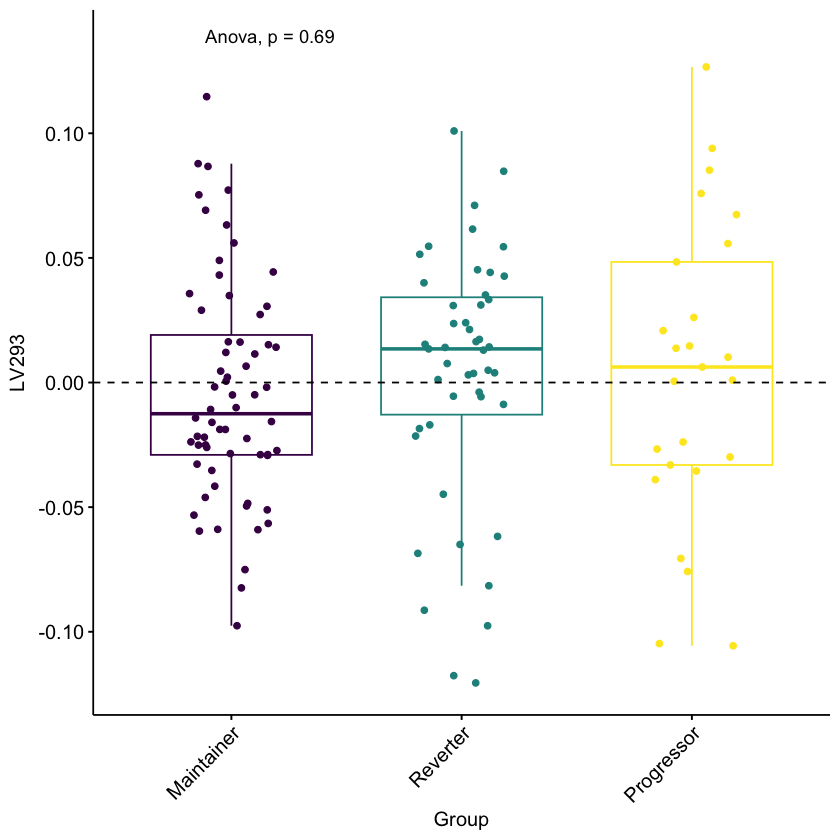

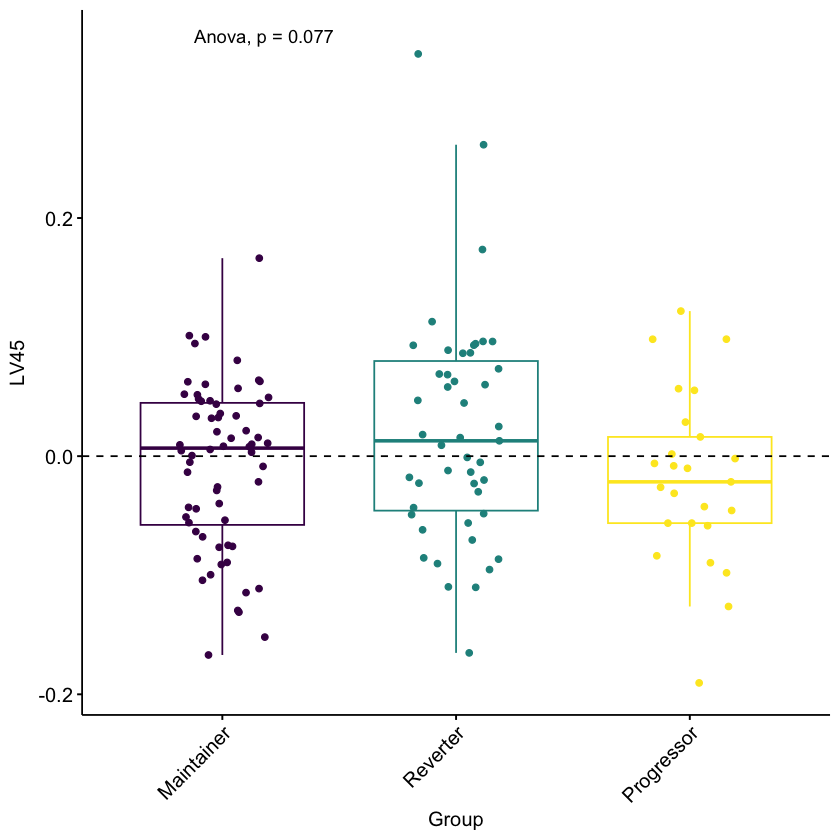

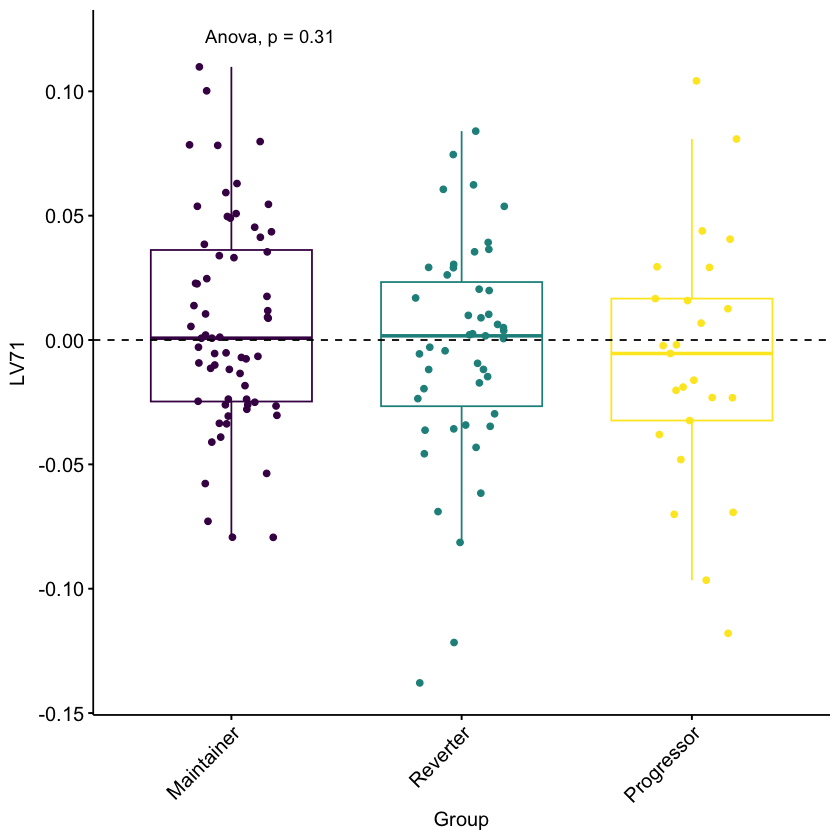

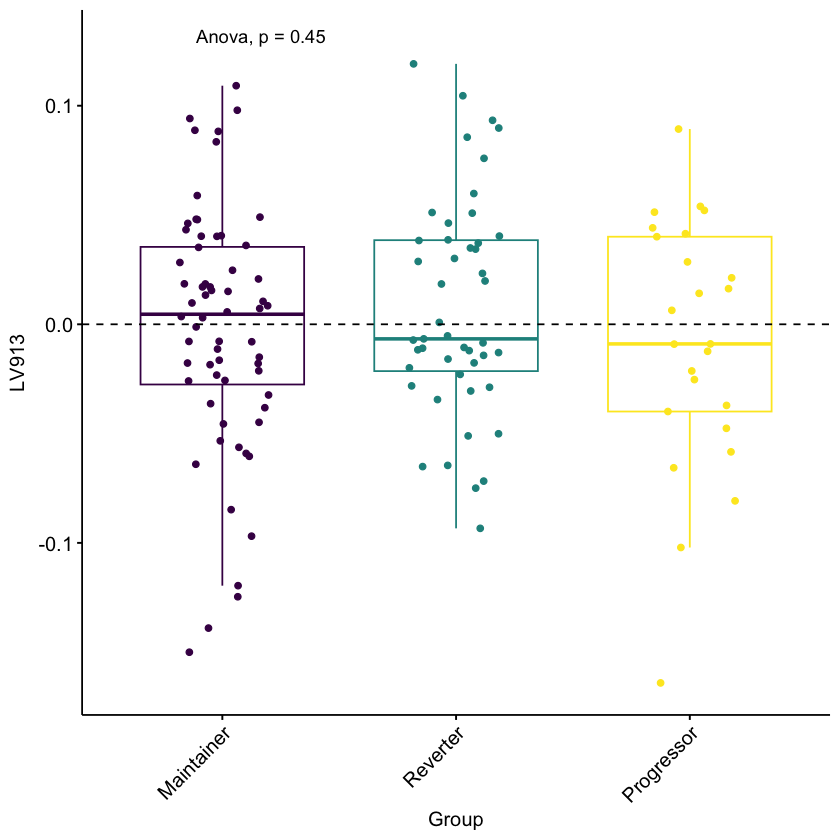

In [17]:
for (i in 1:length(T1D_LV)){
    plot_i <- ggboxplot(DAISY_LV_diff, x = "Group", y = T1D_LV[i], color = "Group", 
          add = "jitter", legend = "none") +
  rotate_x_text(angle = 45)+
  geom_hline(yintercept = mean(DAISY_LV_diff[,T1D_LV[i]]), linetype = 2)+ # Add horizontal line at base mean
  stat_compare_means(method = "anova", label.y = max(DAISY_LV_diff[,T1D_LV[i]])+ 0.01)       # Add global annova p-value 
    print(plot_i)
    
    #ggsave(paste0("LV_",T1D_LV[i],"_visit_",tp,".png"),path = paste0("figures/visit_",tp))
    } 
    #dev.off()

#### Anova using Daisy data 2

In [18]:
res <- data.frame(matrix(nrow = 0, ncol = 6))
# compare between three groups using anova
for (i in 1:length(T1D_LV)){
    comp_i <- compare_means(as.formula(paste0(T1D_LV[i]," ~ Group")),  data = DAISY_diff_proj,
                            method = "anova")
    res <- rbind(res, comp_i)
    }
res_formated_2 <- res[,c(1,2)]
colnames(res_formated_2) <- c("LV","DAISY_anova_p.val")
res_formated_2$DAISY_anova_fdr <- p.adjust(res_formated_2$DAISY_anova_p.val, method = "BH")
res_formated_2

#saveRDS(res_formated,paste0("output/anova_4-LV_",tp,".rds"))

LV,DAISY_anova_p.val,DAISY_anova_fdr
<chr>,<dbl>,<dbl>
LV293,0.70657858,0.7065786
LV45,0.07076396,0.2830558
LV71,0.33988821,0.5781957
LV913,0.43364680,0.5781957


##### Box plot for LVs

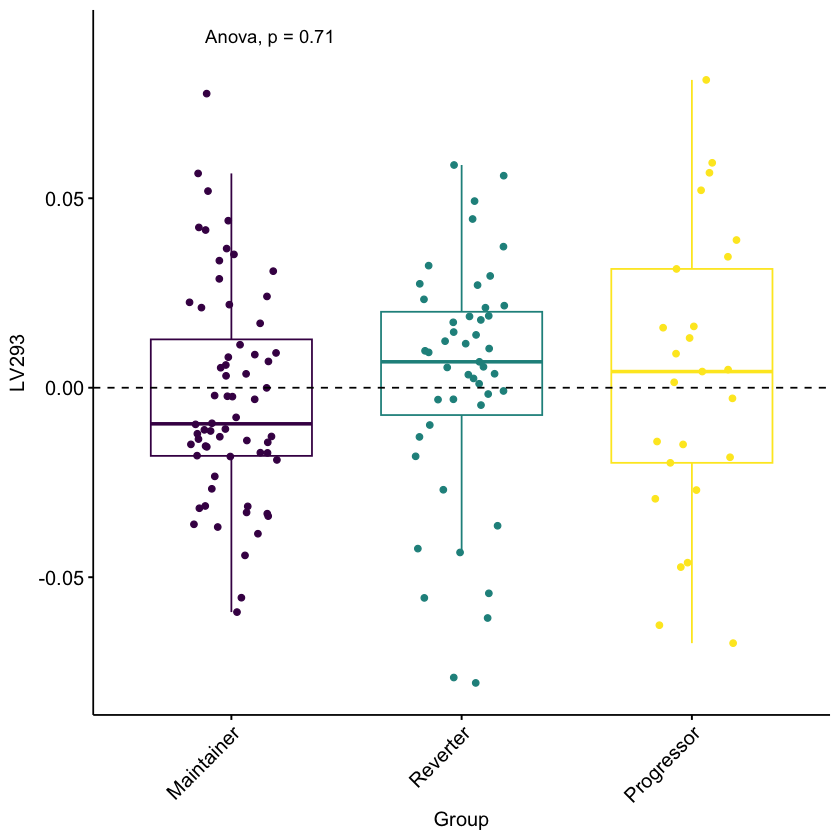

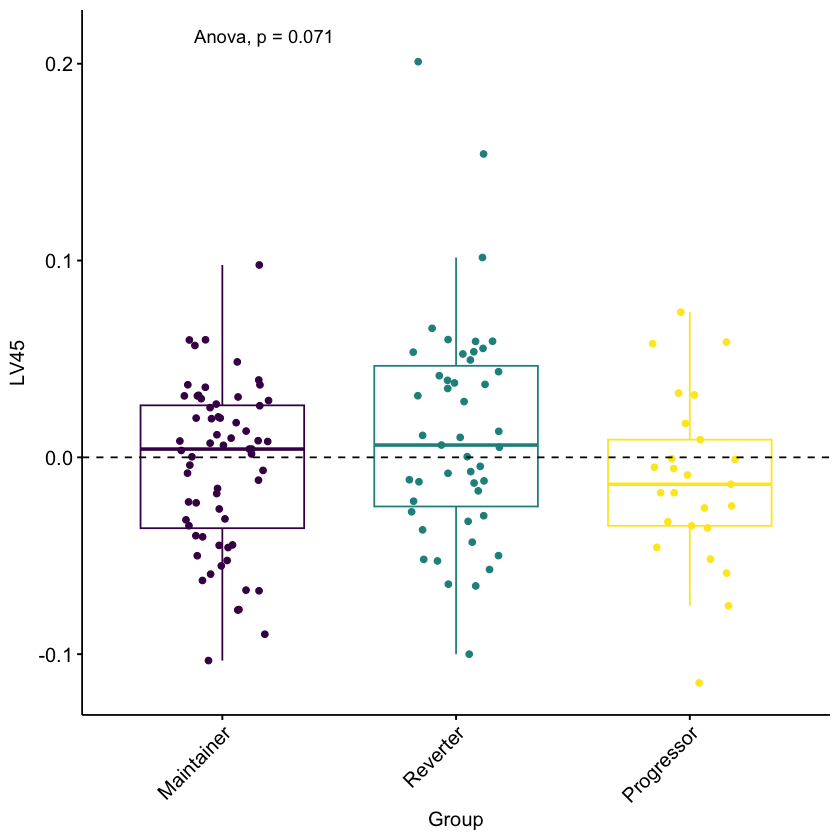

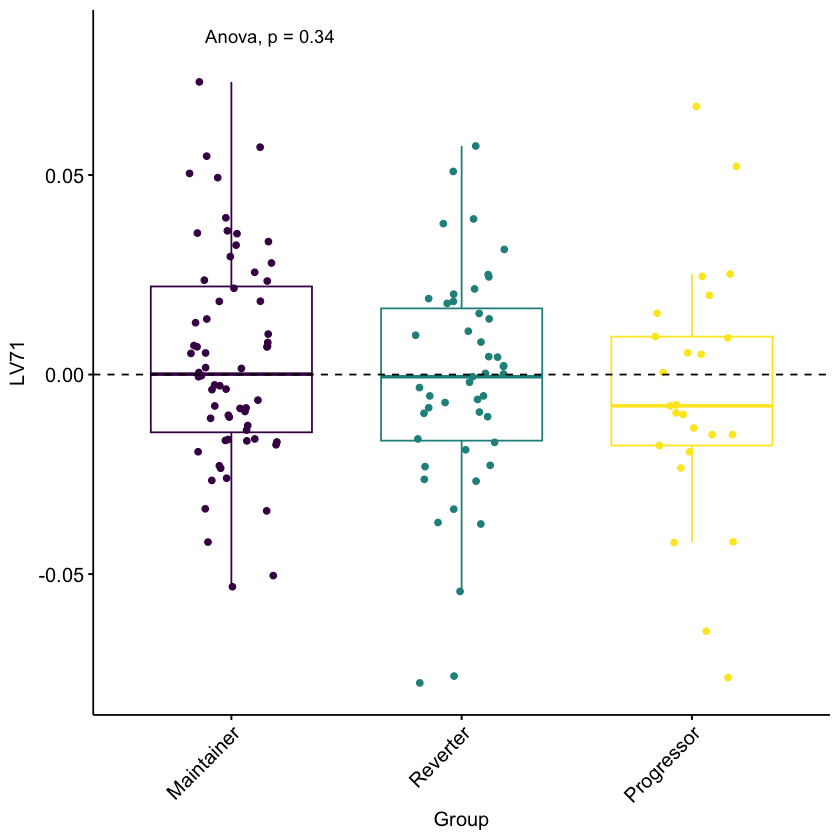

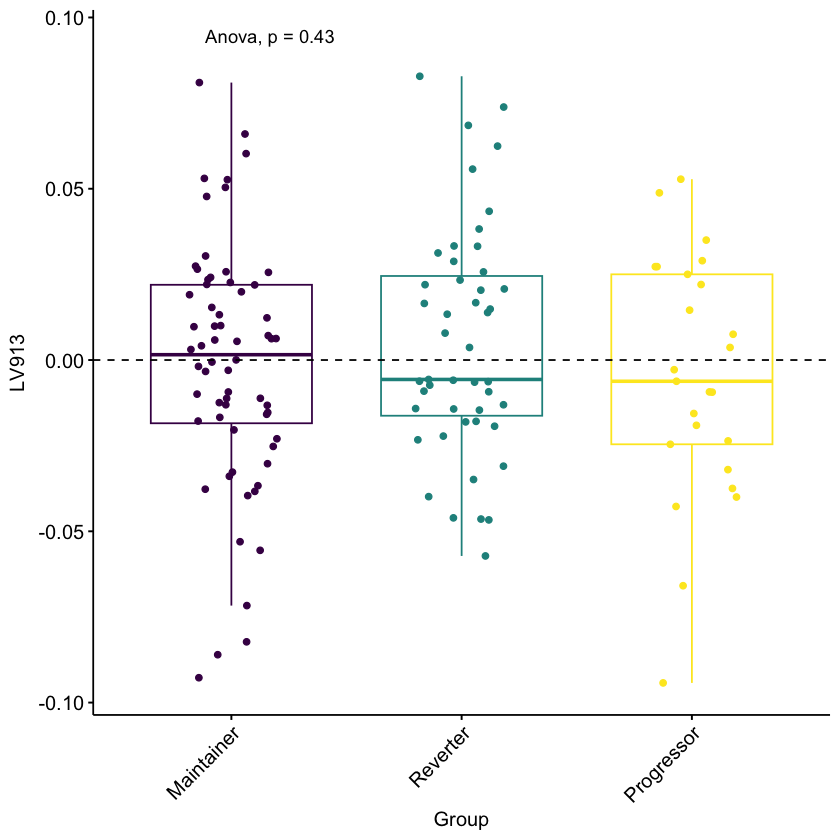

In [19]:
for (i in 1:length(T1D_LV)){
    plot_i <- ggboxplot(DAISY_diff_proj, x = "Group", y = T1D_LV[i], color = "Group", 
          add = "jitter", legend = "none") +
  rotate_x_text(angle = 45)+
  geom_hline(yintercept = mean(DAISY_diff_proj[,T1D_LV[i]]), linetype = 2)+ # Add horizontal line at base mean
  stat_compare_means(method = "anova", label.y = max(DAISY_diff_proj[,T1D_LV[i]])+ 0.01)       # Add global annova p-value 
    print(plot_i)
    
    #ggsave(paste0("LV_",T1D_LV[i],"_visit_",tp,".png"),path = paste0("figures/visit_",tp))
    } 
    #dev.off()

### Saving output as RDS and CSV

In [ ]:
Analysis_1_df <- inner_join(merged_cohort_T1D, res_formated)
dim(Analysis_1_df)
Analysis_1_df

In [ ]:
#saveRDS(analysis_1_df,paste0("output/Analysis_1_Top_17_LVs.rds"))
#write_csv(analysis_1_df,paste0("output/Analysis_1_Top_17_LVs.csv"))

#### UK Biobank Phenotype code description

In [21]:
unique(merged_cohort_T1D$`UK-Bio-Pheno`)

unique(merged_cohort_T1D$`emerge-pheno`)

[1] Type 1 diabetes                                        
[2] Type 1 diabetes without complications                  
[3] Type 1 diabetes with ketoacidosis                      
[4] Non-cancer illness code, self-reported: type 1 diabetes
[5] Type 1 diabetes with ophthalmic complications          
4091 Levels: #Arthrosis #Deforming dorsopathies ... severe traumatic brain injury, does not include concussion

[1] Type 1 diabetes
309 Levels: Abdominal aortic aneurysm ... severe protein-calorie malnutrition

In [22]:
merged_cohort_T1D

LV,UK-Bio-Pheno,UK-Bio-p-value,UK_Bio_fdr,emerge-pheno,emerge-p-value,emerge-fdr
<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
LV293,Type 1 diabetes,3.404989e-05,0.0137392187,Type 1 diabetes,1.405687e-04,0.023540275
LV293,Type 1 diabetes without complications,7.722357e-05,0.0254065554,Type 1 diabetes,1.405687e-04,0.023540275
LV45,Type 1 diabetes with ketoacidosis,8.689770e-05,0.0268025084,Type 1 diabetes,2.955102e-04,0.041666938
LV45,Type 1 diabetes,1.889049e-05,0.0093224579,Type 1 diabetes,2.955102e-04,0.041666938
LV45,"Non-cancer illness code, self-reported: type 1 diabetes",1.225965e-06,0.0012100271,Type 1 diabetes,2.955102e-04,0.041666938
LV45,Type 1 diabetes without complications,1.516479e-05,0.0083153581,Type 1 diabetes,2.955102e-04,0.041666938
LV71,Type 1 diabetes with ketoacidosis,5.915115e-05,0.0208507802,Type 1 diabetes,8.541361e-05,0.021075809
LV913,Type 1 diabetes with ketoacidosis,7.235450e-06,0.0044633680,Type 1 diabetes,3.166332e-06,0.001562585
LV913,Type 1 diabetes,6.869573e-06,0.0044633680,Type 1 diabetes,3.166332e-06,0.001562585


,phenotype,phenotype_desc
,<fct>,<fct>
143115,E4_DM1KETO,Type 1 diabetes with ketoacidosis
1619667,E4_DM1,Type 1 diabetes
2975805,20002_1222,"Non-cancer illness code, self-reported: type 1 diabetes"
3124842,E4_DM1NOCOMP,Type 1 diabetes without complications
3214659,E4_DM1OPTH,Type 1 diabetes with ophthalmic complications


,phenotype,phenotype_desc
,<fct>,<fct>
84882,EUR_250.1,Type 1 diabetes


In [ ]:

pheno_descr_code

emerge_descr_code <- e_T1D_LVs_0.05_fdr [,c('phenotype','phenotype_desc')]%>%
distinct()

emerge_descr_code